# Sesi 4: Clustering Algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import warnings
warnings.simplefilter('ignore')

/var/folders/my/rbl5q7yd7pxb2yk9_qjc7mjr0000gn/T/ipykernel_32588/1729724592.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# plt.style.use('seaborn')

# KMeans

## Generate Data

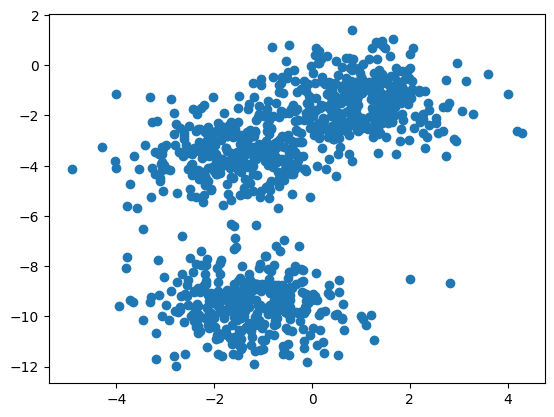

In [3]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=2)

#plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
})
preview_data

,fitur 1,fitur 2
0,-0.552723,-1.912455
1,-1.541116,-3.436230
2,-1.827574,-5.563154
3,-0.896897,-9.898470
4,0.777825,-1.738007
...,...,...
995,2.734474,-3.596585
996,-2.781142,-11.996915
997,-3.038319,-3.284770
998,-0.466904,0.827231


We don't have **target/labels (y)** since this is an **unsupervised** problem.

## Generate Clusters

In [5]:
from sklearn.cluster import KMeans
k = 3
km = KMeans(n_clusters=k, init='random', max_iter=300, random_state=20)
y = km.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [6]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'cluster':list(range(k))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),cluster
0,-1.607079,-3.549896,0
1,-1.277104,-9.557417,1
2,0.993024,-1.390251,2


In [7]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
    'cluster':y
})
preview_data

,fitur 1,fitur 2,cluster
0,-0.552723,-1.912455,2
1,-1.541116,-3.436230,0
2,-1.827574,-5.563154,0
3,-0.896897,-9.898470,1
4,0.777825,-1.738007,2
...,...,...,...
995,2.734474,-3.596585,2
996,-2.781142,-11.996915,1
997,-3.038319,-3.284770,0
998,-0.466904,0.827231,2


## Visualize

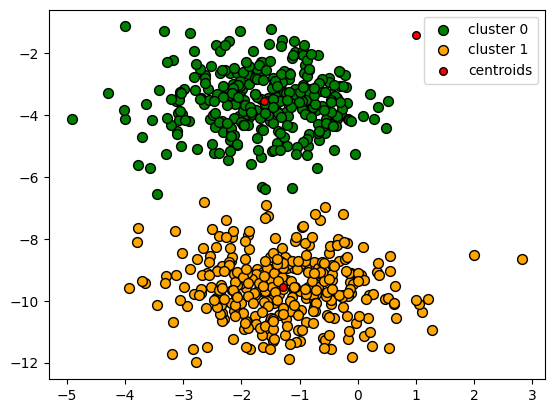

In [8]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 0
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 0'
)

# cluster berwarna orange atau cluster 1
plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 1'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

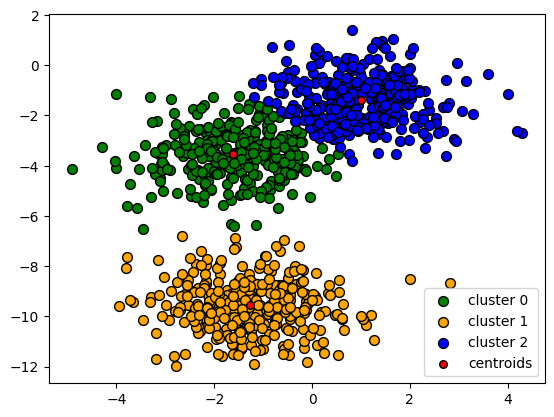

In [9]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 0
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 0'
)

# cluster berwarna orange atau cluster 1
plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna biru atau cluster 2
plt.scatter(
    X[y == 2, 0], X[y == 2, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

### Elbow Method

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    # Inertia is the sum of squared distances of samples to their closest cluster center.

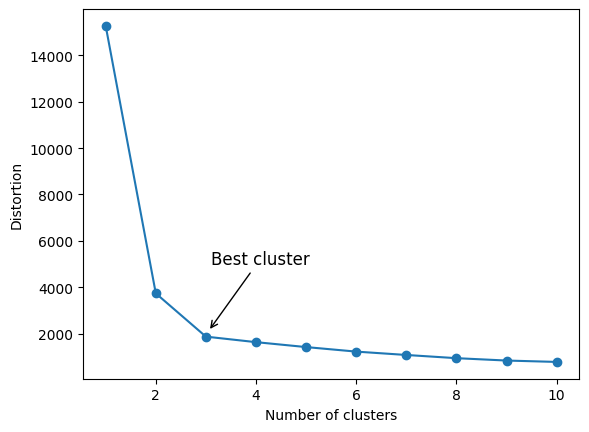

In [11]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3.05, 2100), xytext=(3.1, 5000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 3

# Agglomerative Hierarchical

## Generate Data

In [12]:
# create dataset
X, _ = make_blobs(n_samples=5, n_features=2,
                  centers=3, cluster_std=1,
                  shuffle=True, random_state=42)

preview_data = pd.DataFrame({
                    'fitur 1':X[:,0],
                    'fitur 2':X[:,1],
                    'index':list(range(0,len(X)))
                })

preview_data

,fitur 1,fitur 2,index
0,-0.929985,9.781721,0
1,4.881841,0.059889,1
2,-2.978672,9.556846,2
3,-8.604545,-7.442397,3
4,4.176461,1.507440,4


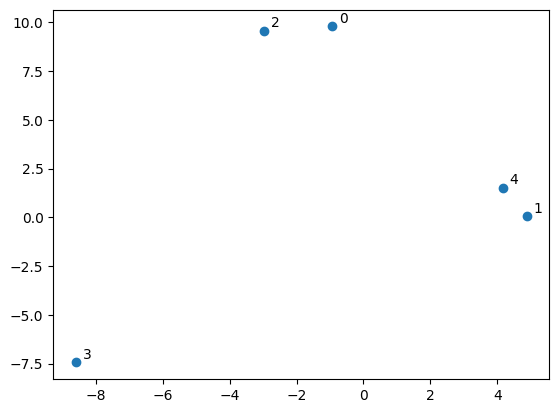

In [13]:
# plot
plt.scatter(X[:, 0], X[:, 1])

txt_gap = 0.2
for i, txt in enumerate(preview_data['index']):
    plt.annotate(txt, (X[i,0] + txt_gap, X[i,1] + txt_gap))

plt.show()

## Generate Clusters

In [14]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering()
y = agg.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

## Visualize Using Dendogram

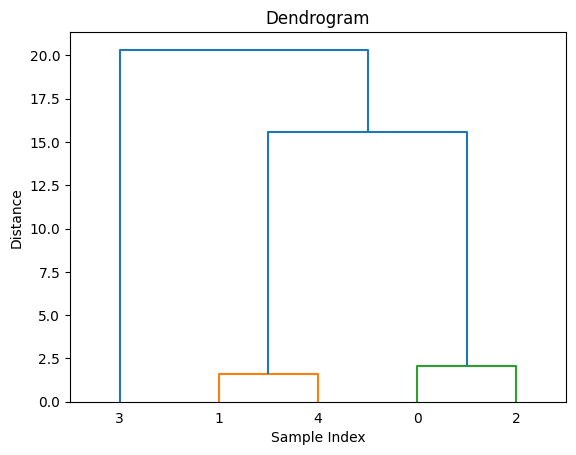

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# Generate the linkage matrix
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

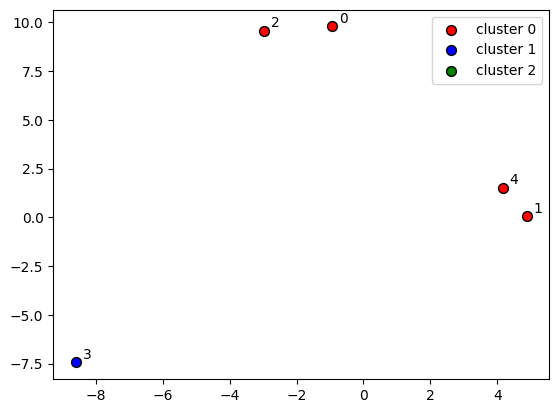

In [16]:
# plot the 3 clusters

# cluster berwarna merah atau cluster 0
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='red', edgecolor='black',
    label='cluster 0'
)

# cluster berwarna biru atau cluster 1
plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna hijau atau cluster 2
plt.scatter(
    X[y == 2, 0], X[y == 2, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 2'
)

txt_gap = 0.2
for i, txt in enumerate(preview_data['index']):
    plt.annotate(txt, (X[i,0] + txt_gap, X[i,1] + txt_gap))

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

# DBSCAN

## Generate Data

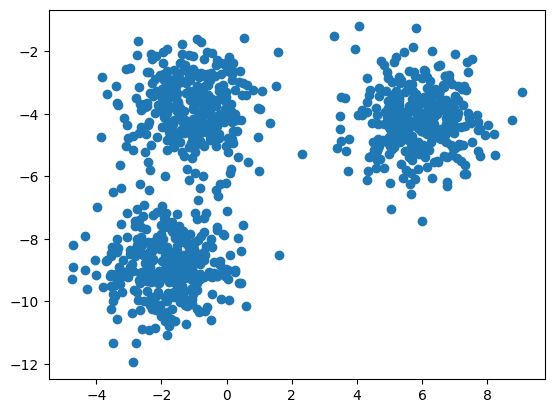

In [17]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=40)

#plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Generate Clusters

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10).fit(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

## Visualize

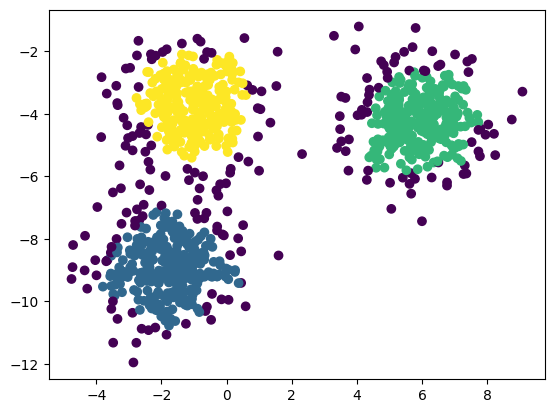

In [19]:
#plot the result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

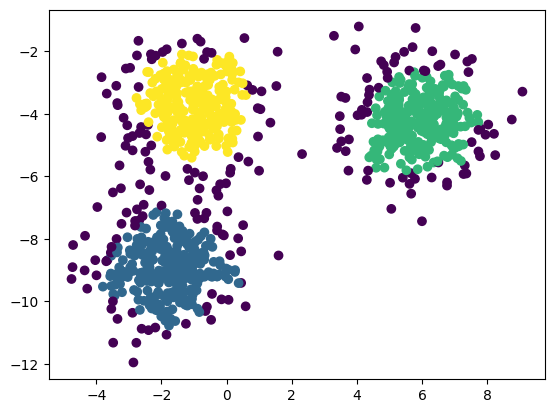

In [20]:
#plot the result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()